# Sentiment Analysis

## What is it Sentiment Analysis ?


At the most basic level, sentiment analysis is the attempt to derive the emotion or 'feeling' of a body of text. The field of sentiment analysis and opinion mining usually also involves some form of data mining to get the text. Many times, the field of natural language processing is also used.


## How does sentiment analysis work?

There are many ways that people analyze bodies of text for sentiment or opinions, but it usually boils down to two methods.

### 1. "Bag of Words" Model:

This model focuses completely on the words, or sometimes a string of words, but usually pays no attention to the "context" so-to-speak. The bag of words model usually has a large list, probably better thought of as a sort of "dictionary," which are considered to be words that carry sentiment. These words each have their own "value" when found in text. The values are typically all added up and the result is a sentiment valuation. The equation to add and derive a number can vary, but this model mainly focuses on the words, and makes no attempt to actually understand language fundamentals.

### 2. Using Natural Language Processing, and the attempt to truly "understand" the text:

This model attempts to have the machine actually understand the sentences structures, context, and is more focused on the succession of a string of words. Usually, this structure requires the machine to have understanding of grammar principles. To do this, Natural Language Processing (NLP) techniques are used to tag parts of speech, named entities, and more, in order to actually understand the "language" of the text, and not just look for target words.


## Which form of sentiment analysis is better?

In a pure "Bag of Words" model, the following sentences will be treated same!

"That's true, I am not a fan."

vs

"That's not true, I am a fan."

However, the meaning of both sentences is totally opposite! In this scenario, Bag of words model will fail.

Implementation of bag of words model is very easy and it can be customized for any domain by adding specific keywords.

Implementation of Natural Language Processing model is complex and does not guarantee high accuracy due to the nuances of language.


## Sentiment Analysis using Bag of Words Model

In [21]:
import pandas as pd
import re

In [22]:
PositiveWords=pd.read_table('datasets/Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('datasets/Negative_words.txt',encoding='latin-1')

In [23]:
PositiveWords.head()

,PositiveWords
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [24]:
NegativeWords.head()

,NegativeWords
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


### Defining a Sentiment Score function using Bag of words

In [25]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence = inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList = re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList = WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    else:
        OverallSentiment='Negative'
    return(OverallSentiment)

### Calling the sentiment score function for a single text

In [26]:
newSentence='I love this mobile, nice experience'

#Calling the function by passing sample sentence
ComputeSentimentScore(newSentence)

'Positive'

In [27]:
newSentence='I hate this mobile, worst experience'

#Calling the function by passing sample sentence
ComputeSentimentScore(newSentence)

'Negative'

### Calling the sentiment score function for a column in dataframe

In [28]:
IndigoTweets=pd.read_csv('datasets/Indigo Tweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head()

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...


In [29]:
# Calling sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(ComputeSentimentScore)
IndigoTweets.head()

,Tweets,Sentiment
0,Hackers galore Also being sued for passed deb...,Negative
1,Hackers galore Also being sued for passed deb...,Negative
2,London England UK Come rock with ya girl Fri...,Negative
3,NewsAlert BengaluruVijaywada Indigo flight 6E...,Negative
4,Hackers galore Also being sued for passed debt...,Negative


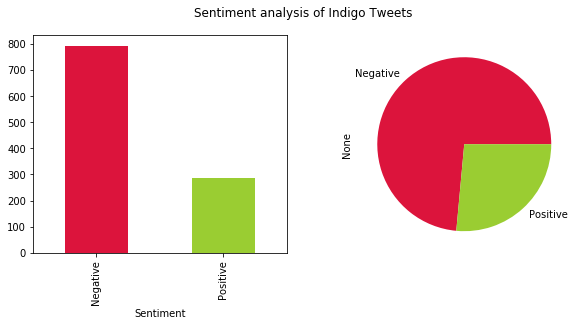

In [31]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt

fig, subPlot = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Indigo Tweets")

# Grouping the data
GroupedData = IndigoTweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'yellowgreen'])